In [11]:
from META_TOOLBOX.META import *
import META_TOOLBOX.META_CO_LIBRARY as META_CO
import META_TOOLBOX.META_HC_LIBRARY as META_HC
import META_TOOLBOX.META_SA_LIBRARY as META_SA
import META_TOOLBOX.META_FA_LIBRARY as META_FA
import META_TOOLBOX.META_DE_LIBRARY as META_DE
import META_TOOLBOX.META_GA_LIBRARY as META_GA
import META_TOOLBOX.META_PSO_LIBRARY as META_PSO
import META_TOOLBOX.META_ZERO_LIBRARY as META_ZERO
from OF_FUNCTION import *
from META_TOOLBOX import GAMMA_ASSEMBLY

# Estudo de caso Lets make

O estudo de caso envolve a proposição de uma cesta de produto em função do custo total proposto pelo lojista. As simulações terão como base o preço de custo de cada produto e também o lucro obtido com a venda do mesmo. O algorimto empregado será a colônia de vagalumes e o máximo de gasto permitido será R$ 38.00 por produto.

A tabela hipótetica de **custo** _versus_ **lucro** é descrita abaixo:    
   
| Produto de Beleza       | Custo (Reais) | Lucro (Reais) |
|-------------------------|----------------------|------------|
| Batom                   | 5,00                 | 5,00       |
| Máscara de Cílios       | 4,50                 | 5,50       |
| Esmalte                 | 2,50                 | 7,50       |
| Sombra para Olhos       | 6,00                 | 4,00       |
| Blush                   | 5,50                 | 4,50       |
| Pincel de Maquiagem     | 7,00                 | 3,00       |
| Shampoo                 | 4,00                 | 6,00       |
| Condicionador           | 4,20                 | 5,80       |
| Sabonete Líquido        | 3,80                 | 6,20       |
| Creme Hidratante        | 6,50                 | 3,50       |
| Perfume                 | 9,00                 | 1,00       |
| Loção Corporal          | 5,80                 | 4,20       |
| Removedor de Maquiagem  | 3,50                 | 6,50       |  
  

No caso a cesta exemplo terá um total de 13 produtos conforme especificação do cliente.

In [12]:
COST =   [5.0, 4.5, 2.5, 6.0, 5.5, 7.0, 4.0, 4.2, 3.8, 6.5, 9.0, 5.8, 3.5]
PROFIT = [5.0, 5.5, 7.5, 4.0, 4.5, 3.0, 6.0, 5.8, 6.2, 3.5, 1.0, 4.2, 6.5]
print('Custo total da possível cesta: R$ ', sum(COST))
print('Lucro total da possível cesta: R$ ', sum(PROFIT))
print('Ganho percentual com a venda de todos produtos: ', sum(PROFIT) / sum(COST) * 100, ' %')

Custo total da possível cesta: R$  67.3
Lucro total da possível cesta: R$  62.7
Ganho percentual com a venda de todos produtos:  93.16493313521546  %


In [13]:
USER_INSTANCE = 'LETS'
D = 13
X_L = [0.0] * D
X_U = [1.0] * D
VARS = []
for I in range(D):
    VARS.append({'X': [0, 1]})

In [14]:
SETUP = {
            'ALGORITHM': 'FIREFLY ALGORITHM 01',
            'N_REP': 1,
            'N_POP': 20,
            'N_ITER': 10000,
            'X_L': X_L,
            'X_U': X_U,
            'D': D,
            'PARAMETERS': {
                            'ATTRACTIVENESS (BETA_0)': 0.98,
                            'MIN. RANDOM FACTOR (ALPHA_MIN)': 0.10,
                            'MAX. RANDOM FACTOR (ALPHA_MAX)': 1.00,
                            'LIGHT ABSORPTION (GAMMA)': GAMMA_ASSEMBLY(X_L, X_U, D, 2),
                            'THETA': 0.98,
                            'TYPE ALPHA UPDATE': 'YANG 0',
                            'SCALING (S_D)': True
                          },
            'NULL_DIC': {'X': VARS, 'INSTANCE': USER_INSTANCE, 'R_P': 10 ** 6},
            'OF': LETS_MAKE,
            'TYPE CODE': 'REAL CODE'
        }

POP = META_CO.initial_pops(SETUP['N_REP'], SETUP['N_POP'], SETUP['D'], SETUP['X_L'], SETUP['X_U'], SETUP['TYPE CODE'])
INFO = [[SETUP, I] for I in POP]
RESULTS_ITER, BEST_ITER, AVERAGE_ITER, WORST_ITER  = FIREFLY_001(INFO[0])

In [15]:
X = list(BEST_ITER['X_POSITION'][-1])
lista_produtos = []
for I in range(len(X)):
    AUX = round(X[I])
    lista_produtos.append(AUX)

# Cria uma lista de descrições para os itens
itens = [
    "Batom",
    "Máscara de Cílios",
    "Esmalte",
    "Sombra para Olhos",
    "Blush",
    "Pincel de Maquiagem",
    "Shampoo",
    "Condicionador",
    "Sabonete Líquido",
    "Creme Hidratante",
    "Perfume",
    "Loção Corporal",
    "Removedor de Maquiagem"
]

# Percorre a lista e imprime o nome do item e se é considerado produto ou não
for i in range(len(lista_produtos)):
    produto = lista_produtos[i]
    descricao = itens[i]

    if produto == 1:
        print(f"{descricao} é considerado um produto.")
    else:
        print(f"{descricao} não é considerado um produto.")


Batom é considerado um produto.
Máscara de Cílios não é considerado um produto.
Esmalte é considerado um produto.
Sombra para Olhos não é considerado um produto.
Blush não é considerado um produto.
Pincel de Maquiagem não é considerado um produto.
Shampoo é considerado um produto.
Condicionador é considerado um produto.
Sabonete Líquido é considerado um produto.
Creme Hidratante não é considerado um produto.
Perfume não é considerado um produto.
Loção Corporal não é considerado um produto.
Removedor de Maquiagem é considerado um produto.


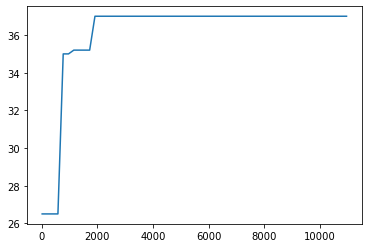

In [16]:
import matplotlib.pyplot as plt
OF_VALUES = [-I for I in list(BEST_ITER['OF'])]
EVALUATIONS = list(BEST_ITER['NEOF'])
plt.plot(EVALUATIONS, OF_VALUES)

In [17]:
print('Ganho percentual com a venda de todos produtos: ', OF_VALUES[-1] / 38 * 100, ' %')

Ganho percentual com a venda de todos produtos:  97.36842105263158  %


In [62]:
import numpy as np

numbers = np.random.choice(3, size=3, replace=False)
print(sorted(numbers), type(sorted(numbers)))

[0, 1, 2] <class 'list'>


In [360]:
d = 3


array([1, 0, 2])

In [535]:
d = 3

print(probs,'\n', pos)

[0.33333333333333337, 0.33333333333333337, 0.33333333333333337] 
 [1, 2, 3]


In [852]:
n_dimensions = 3
pos = [int(c+1) for c in range(n_dimensions)]
probs = [100/n_dimensions/100 for c in range(n_dimensions)]
number_cuts = np.random.choice(pos, 1, replace=False, p=probs)[0]
point_cuts = np.random.choice(n_dimensions, size=number_cuts, replace=False)
point_cuts = sorted(point_cuts)
point_cuts

[0, 1, 2]

In [780]:
mask = [0 for _ in range(n_dimensions)]
for p in point_cuts:
    mask[p] = 1

for i in range(n_dimensions):
    

[0, 1, 1]